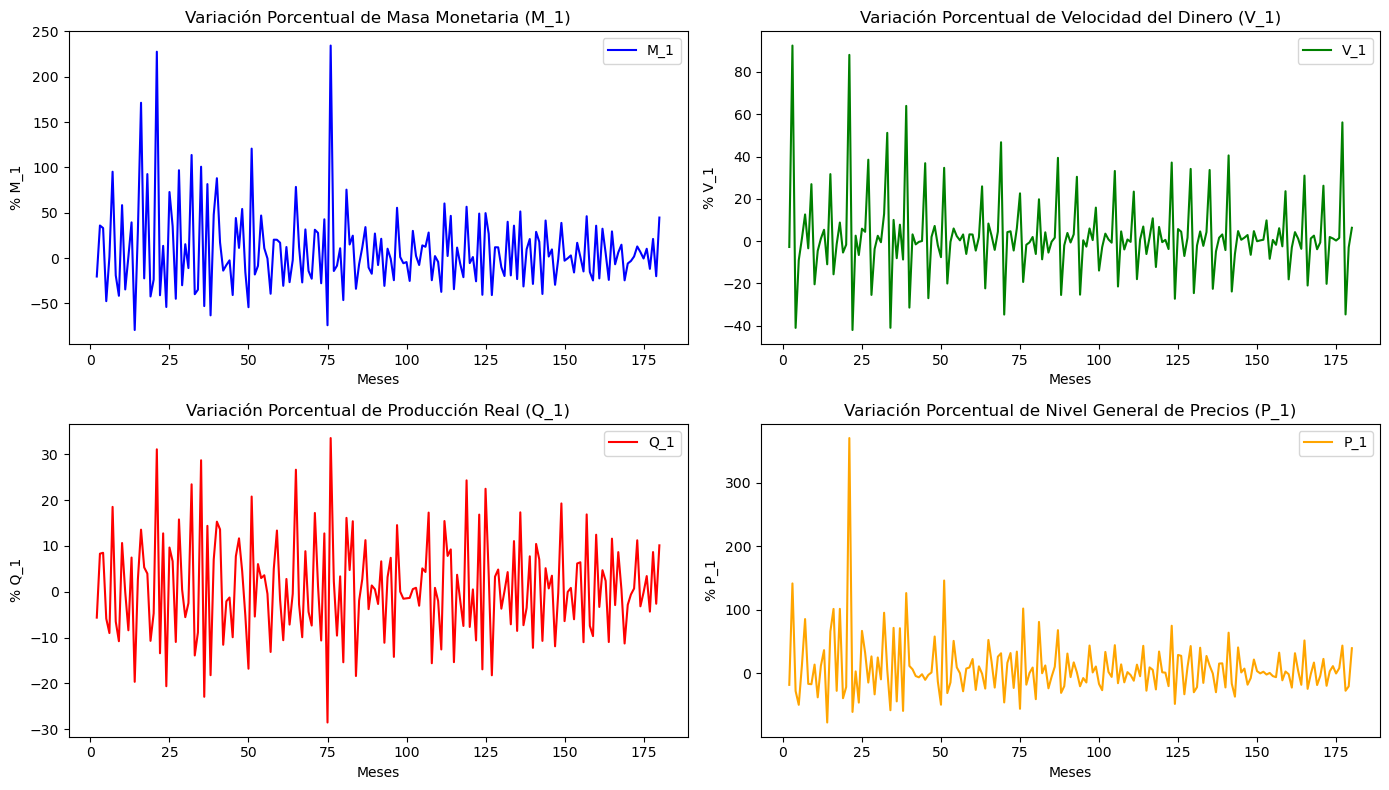

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para generar M_1 con pendiente lineal suave, ruido gausiano y aumento del 5% cada 3 meses
def generar_M_1(meses):
    np.random.seed(42)
    ruido = np.random.normal(0, 25, len(meses))
    pendiente_suave = 0.7 * meses # Pendiente menor a la de M_1
    M_1 = 50 + pendiente_suave + ruido
    for i in range(0, len(meses), 6):
        pico = 2 + np.random.normal(0, 0.5) # Pico gausiano que duplica la velocidad
        M_1[i+1] += pico # Duración del pico: 1 mes
    return M_1

# Función para generar V_1 con pendiente lineal suave, picos gaussianos cada 6 meses y ruido
def generar_V_1(meses):
    np.random.seed(42)
    pendiente_suave = 0.02 * meses # Pendiente menor a la de M_1
    V_1 = 1.5 + pendiente_suave + np.random.normal(0, 0.1, len(meses))
    for i in range(0, len(meses), 6):
        pico = 1 + np.random.normal(0, 0.5) # Pico gausiano que triplica la velocidad
        V_1[i+2] += pico # Duración del pico: 2 meses
    return V_1

# Función para generar Q_1 con pendiente lineal suave, picos gaussianos cada 6 meses (2 meses después de los picos de V_1) y ruido
def generar_Q_1(meses):
    np.random.seed(42)
    pendiente_suave = 0.4 * meses # Pendiente levemente distinta a la de V_1
    Q_1 = 100 + pendiente_suave + np.random.normal(0, 10, len(meses))
    for i in range(2, len(meses), 6):
        pico = 10 + np.random.normal(0, 0.5) # Pico gausiano que duplica la producción base
        Q_1[i+2] += pico # Duración del pico: 2 meses
    return Q_1

# Generar datos
meses = np.arange(1, 181)
M_1 = generar_M_1(meses)
V_1 = generar_V_1(meses)
Q_1 = generar_Q_1(meses)

# Crear DataFrame
df = pd.DataFrame({
    'Meses': meses,
    'M_1': M_1,
    'V_1': V_1,
    'Q_1': Q_1
})

# Calcular P_1 sin desfase
df['P_1'] = (df['M_1'] * df['V_1']) / df['Q_1']

# Función para calcular variaciones porcentuales
def calcular_variacion_porcentual(serie):
    return serie.pct_change() * 100

# Aplicar la función a cada columna relevante
df['M_1'] = calcular_variacion_porcentual(df['M_1'])
df['V_1'] = calcular_variacion_porcentual(df['V_1'])
df['Q_1'] = calcular_variacion_porcentual(df['Q_1'])
df['P_1'] = calcular_variacion_porcentual(df['P_1'])

# Eliminar el primer valor porque será NaN debido a la diferencia porcentual
df = df.dropna()

# Colores para los gráficos
colors = ['blue', 'green', 'red', 'orange']

# Plotear los resultados
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Meses'], df['M_1'], color=colors[0], label='M_1')
plt.title('Variación Porcentual de Masa Monetaria (M_1)')
plt.xlabel('Meses')
plt.ylabel('% M_1')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['Meses'], df['V_1'], color=colors[1], label='V_1')
plt.title('Variación Porcentual de Velocidad del Dinero (V_1)')
plt.xlabel('Meses')
plt.ylabel('% V_1')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['Meses'], df['Q_1'], color=colors[2], label='Q_1')
plt.title('Variación Porcentual de Producción Real (Q_1)')
plt.xlabel('Meses')
plt.ylabel('% Q_1')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['Meses'], df['P_1'], color=colors[3], label='P_1')
plt.title('Variación Porcentual de Nivel General de Precios (P_1)')
plt.xlabel('Meses')
plt.ylabel('% P_1')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
df

,Meses,M_1,V_1,Q_1,P_1
1,2,-20.377163,-2.771143,-5.646717,-17.950524
2,3,35.888065,92.481549,8.307934,141.496115
3,4,33.068972,-41.030042,8.500815,-27.677302
4,5,-47.569987,-8.989093,-5.870907,-49.306820
5,6,1.470025,1.268669,-9.013870,12.937371
...,...,...,...,...,...
175,176,10.249112,1.492724,3.417856,8.196816
176,177,-11.921229,56.145517,-4.332979,43.760151
177,178,21.072346,-34.669030,8.661628,-27.207296
178,179,-20.031811,-2.916595,-2.614227,-20.280101


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para generar M_1 con pendiente lineal suave, ruido gausiano y aumento del 5% cada 3 meses
def generar_M_1(meses):
    np.random.seed(42)
    ruido = np.random.normal(0, 25, len(meses))
    pendiente_suave = 0.7 * meses # Pendiente menor a la de M_1
    M_1 = 50 + pendiente_suave + ruido
    for i in range(0, len(meses), 6):
        pico = 2 + np.random.normal(0, 0.5) # Pico gausiano que duplica la velocidad
        M_1[i+1] += pico # Duración del pico: 1 mes
    return M_1

# Función para generar V_1 con pendiente lineal suave, picos gaussianos cada 6 meses y ruido
def generar_V_1(meses):
    np.random.seed(42)
    pendiente_suave = 0.02 * meses # Pendiente menor a la de M_1
    V_1 = 1.5 + pendiente_suave + np.random.normal(0, 0.1, len(meses))
    for i in range(0, len(meses), 6):
        pico = 1 + np.random.normal(0, 0.5) # Pico gausiano que triplica la velocidad
        V_1[i+2] += pico # Duración del pico: 2 meses
    return V_1

# Función para generar Q_1 con pendiente lineal suave, picos gaussianos cada 6 meses (2 meses después de los picos de V_1) y ruido
def generar_Q_1(meses):
    np.random.seed(42)
    pendiente_suave = 0.4 * meses # Pendiente levemente distinta a la de V_1
    Q_1 = 100 + pendiente_suave + np.random.normal(0, 10, len(meses))
    for i in range(2, len(meses), 6):
        pico = 10 + np.random.normal(0, 0.5) # Pico gausiano que duplica la producción base
        Q_1[i+2] += pico # Duración del pico: 2 meses
    return Q_1

# Generar datos
meses = np.arange(1, 181)
M_1 = generar_M_1(meses)
V_1 = generar_V_1(meses)
Q_1 = generar_Q_1(meses)

# Crear DataFrame
df = pd.DataFrame({
    'Meses': meses,
    'M_1': M_1,
    'V_1': V_1,
    'Q_1': Q_1
})

# Calcular P_1 sin desfase
df['P_1'] = (df['M_1'] * df['V_1']) / df['Q_1']

# Función para calcular variaciones porcentuales
def calcular_variacion_porcentual(serie):
    return serie.pct_change() * 100

# Aplicar la función a cada columna relevante
df['M_1'] = calcular_variacion_porcentual(df['M_1'])
df['V_1'] = calcular_variacion_porcentual(df['V_1'])
df['Q_1'] = calcular_variacion_porcentual(df['Q_1'])
df['P_1'] = calcular_variacion_porcentual(df['P_1'])

# Eliminar el primer valor porque será NaN debido a la diferencia porcentual
df = df.dropna().reset_index(drop=True)

# Ajustar el array de meses
meses = meses[1:]

# Función para crear y desfasear el DataFrame
def crear_y_desfasear_dataframe(meses, V, M, Q, P):
    data = {
        'Meses': meses,
        'Velocidad del Dinero (V)': V,
        'Masa Monetaria (M)': M,
        'Producción Real (Q)': Q,
        'Nivel de Precios (P)': P,
    }
    df = pd.DataFrame(data)
    df['Velocidad del Dinero (V)'] = df['Velocidad del Dinero (V)'].shift(-3)
    df['Producción Real (Q)'] = df['Producción Real (Q)'].shift(0)
    df['Masa Monetaria (M)'] = df['Masa Monetaria (M)'].shift(-1)
    return df

# Crear el DataFrame con los datos desfasados
df_desfasado = crear_y_desfasear_dataframe(meses, df['V_1'], df['M_1'], df['Q_1'], df['P_1'])

# Eliminar filas con valores NaN resultantes del desfase
df_desfasado = df_desfasado.dropna().reset_index(drop=True)

# Crear características desfasadas (lags) hasta un máximo de 6 meses
for lag in range(0, 6):
    df_desfasado[f'V_lag_{lag}'] = df_desfasado['Velocidad del Dinero (V)'].shift(lag)
    df_desfasado[f'M_lag_{lag}'] = df_desfasado['Masa Monetaria (M)'].shift(lag)
    df_desfasado[f'Q_lag_{lag}'] = df_desfasado['Producción Real (Q)'].shift(lag)

# Eliminar filas con valores NaN nuevamente debido a la creación de lags
df_desfasado = df_desfasado.dropna().reset_index(drop=True)


In [12]:
df_desfasado

,Meses,Velocidad del Dinero (V),Masa Monetaria (M),Producción Real (Q),Nivel de Precios (P),V_lag_0,M_lag_0,Q_lag_0,V_lag_1,M_lag_1,...,Q_lag_2,V_lag_3,M_lag_3,Q_lag_3,V_lag_4,M_lag_4,Q_lag_4,V_lag_5,M_lag_5,Q_lag_5
0,7,-20.422914,-19.096175,18.522638,85.478122,-20.422914,-19.096175,18.522638,26.931456,95.216142,...,-5.870907,12.610341,-47.569987,8.500815,1.268669,33.068972,8.307934,-8.989093,35.888065,-5.646717
1,8,-4.594413,-41.638656,-6.507836,-16.409130,-4.594413,-41.638656,-6.507836,-20.422914,-19.096175,...,-9.013870,-3.402697,1.470025,-5.870907,12.610341,-47.569987,8.500815,1.268669,33.068972,8.307934
2,9,1.181173,58.346114,-10.795185,-16.956384,1.181173,58.346114,-10.795185,-4.594413,-41.638656,...,18.522638,26.931456,95.216142,-9.013870,-3.402697,1.470025,-5.870907,12.610341,-47.569987,8.500815
3,10,5.360089,-34.648607,10.636790,13.892697,5.360089,-34.648607,10.636790,1.181173,58.346114,...,-6.507836,-20.422914,-19.096175,18.522638,26.931456,95.216142,-9.013870,-3.402697,1.470025,-5.870907
4,11,-10.958674,1.392616,-0.080745,-37.600736,-10.958674,1.392616,-0.080745,5.360089,-34.648607,...,-10.795185,-4.594413,-41.638656,-6.507836,-20.422914,-19.096175,18.522638,26.931456,95.216142,-9.013870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,173,1.492724,6.594656,11.232817,3.348177,1.492724,6.594656,11.232817,0.270315,12.778072,...,-0.596888,1.932128,-3.249030,-2.835962,-20.204300,-6.013110,-11.291854,26.197801,-24.581235,0.480595
167,174,56.145517,-0.505482,-3.175946,11.465489,56.145517,-0.505482,-3.175946,1.492724,6.594656,...,0.712857,1.248420,1.724242,-0.596888,1.932128,-3.249030,-2.835962,-20.204300,-6.013110,-11.291854
168,175,-34.669030,10.249112,-0.141385,-0.095284,-34.669030,10.249112,-0.141385,56.145517,-0.505482,...,11.232817,0.270315,12.778072,0.712857,1.248420,1.724242,-0.596888,1.932128,-3.249030,-2.835962
169,176,-2.916595,-11.921229,3.417856,8.196816,-2.916595,-11.921229,3.417856,-34.669030,10.249112,...,-3.175946,1.492724,6.594656,11.232817,0.270315,12.778072,0.712857,1.248420,1.724242,-0.596888


    Feature  Importance
13  M_lag_1    0.792824
3   V_lag_3    0.106401
2   V_lag_2    0.051481
7   Q_lag_1    0.038731
16  M_lag_4    0.007530
12  M_lag_0    0.003034
0   V_lag_0    0.000000
11  Q_lag_5    0.000000
15  M_lag_3    0.000000
14  M_lag_2    0.000000
9   Q_lag_3    0.000000
10  Q_lag_4    0.000000
1   V_lag_1    0.000000
8   Q_lag_2    0.000000
6   Q_lag_0    0.000000
5   V_lag_5    0.000000
4   V_lag_4    0.000000
17  M_lag_5    0.000000


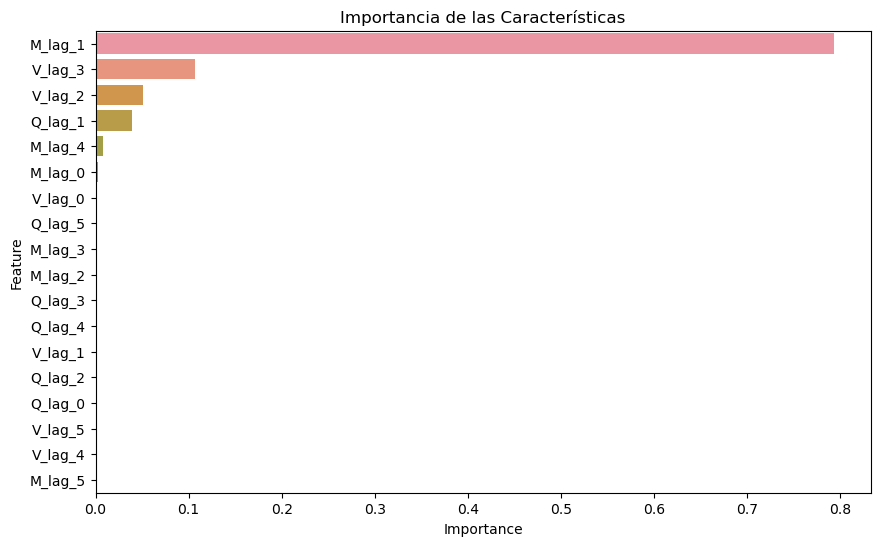

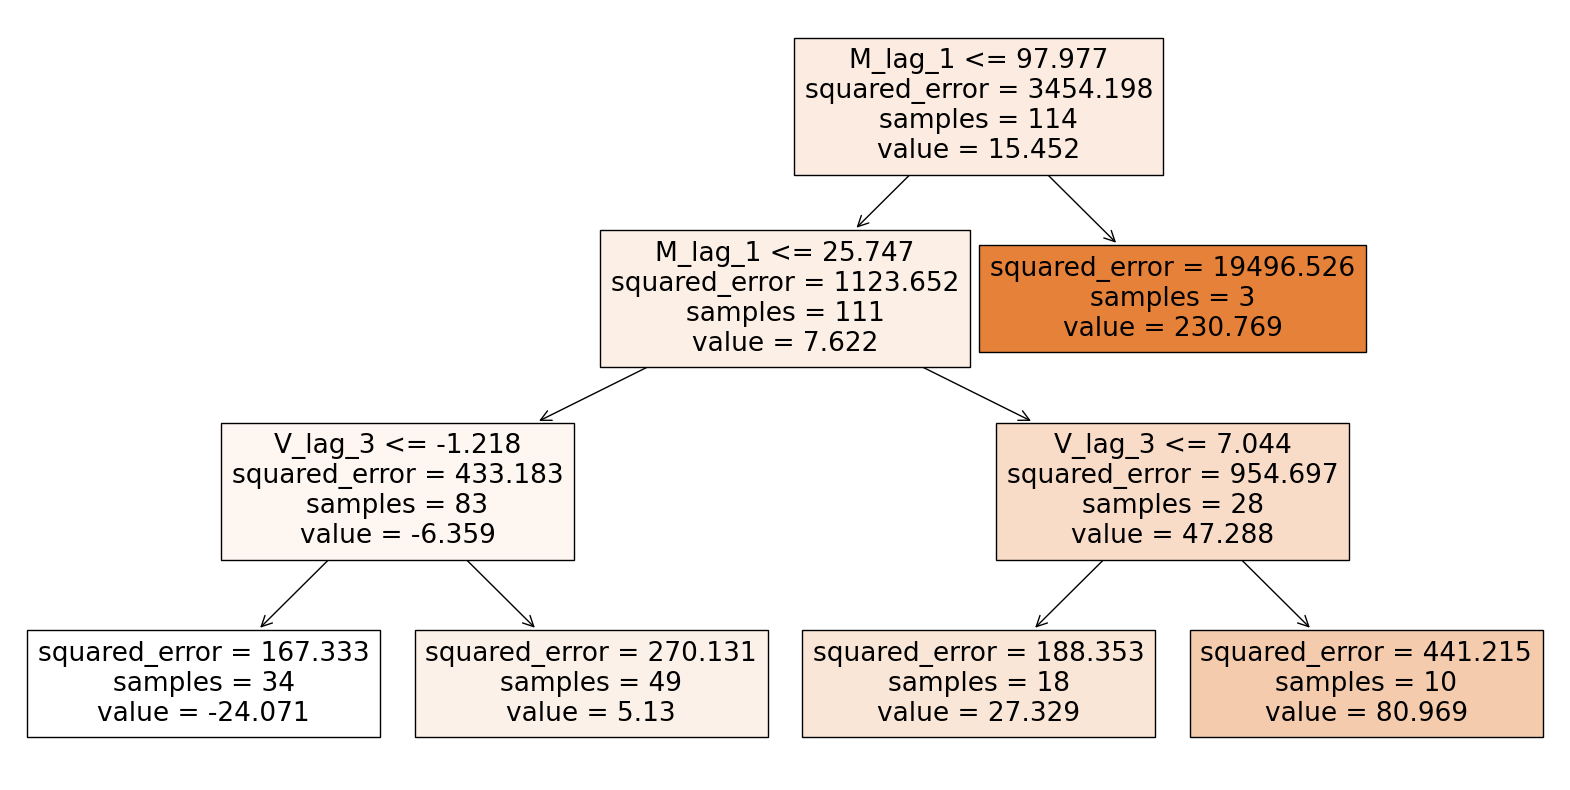

|--- M_lag_1 <= 97.98
|   |--- M_lag_1 <= 25.75
|   |   |--- V_lag_3 <= -1.22
|   |   |   |--- value: [-24.07]
|   |   |--- V_lag_3 >  -1.22
|   |   |   |--- value: [5.13]
|   |--- M_lag_1 >  25.75
|   |   |--- V_lag_3 <= 7.04
|   |   |   |--- value: [27.33]
|   |   |--- V_lag_3 >  7.04
|   |   |   |--- value: [80.97]
|--- M_lag_1 >  97.98
|   |--- value: [230.77]

   Nivel de Precios (P)    M_lag_1    V_lag_3    V_lag_2    Q_lag_1
0             85.478122  95.216142  12.610341  -3.402697  -9.013870
1            -16.409130 -19.096175  -3.402697  26.931456  18.522638
2            -16.956384 -41.638656  26.931456 -20.422914  -6.507836
3             13.892697  58.346114 -20.422914  -4.594413 -10.795185
4            -37.600736 -34.648607  -4.594413   1.181173  10.636790


In [20]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree, export_text

# Definir características (lags) y variable objetivo
features = [f'V_lag_{i}' for i in range(0, 6)] + [f'Q_lag_{i}' for i in range(0, 6)] + [f'M_lag_{i}' for i in range(0, 6)]
target = 'Nivel de Precios (P)'

# Entrenar un modelo de Random Forest con hiperparámetros ajustados
X = df_desfasado[features]
y = df_desfasado[target]

model = RandomForestRegressor(
    n_estimators=5,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=3,
    random_state=42
)
model.fit(X, y)

# Obtener la importancia de las características
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Imprimir la importancia de las características
print(feature_importances_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature')
plt.title('Importancia de las Características')
plt.show()

# Imprimir un árbol de decisión del bosque aleatorio
# Seleccionamos el primer árbol
tree = model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

# Exportar texto del árbol de decisión para ver las reglas
tree_text = export_text(tree, feature_names=features)
print(tree_text)

# Seleccionar las tres características más importantes
top_features = feature_importances_df['Feature'].head(4).tolist()

# Crear un nuevo DataFrame con la variable target (P) y las tres características más importantes
df_top_features = df_desfasado[['Nivel de Precios (P)'] + top_features]
print(df_top_features.head())


In [21]:
df_top_features

,Nivel de Precios (P),M_lag_1,V_lag_3,V_lag_2,Q_lag_1
0,85.478122,95.216142,12.610341,-3.402697,-9.013870
1,-16.409130,-19.096175,-3.402697,26.931456,18.522638
2,-16.956384,-41.638656,26.931456,-20.422914,-6.507836
3,13.892697,58.346114,-20.422914,-4.594413,-10.795185
4,-37.600736,-34.648607,-4.594413,1.181173,10.636790
...,...,...,...,...,...
166,3.348177,12.778072,1.932128,1.248420,0.712857
167,11.465489,6.594656,1.248420,0.270315,11.232817
168,-0.095284,-0.505482,0.270315,1.492724,-3.175946
169,8.196816,10.249112,1.492724,56.145517,-0.141385


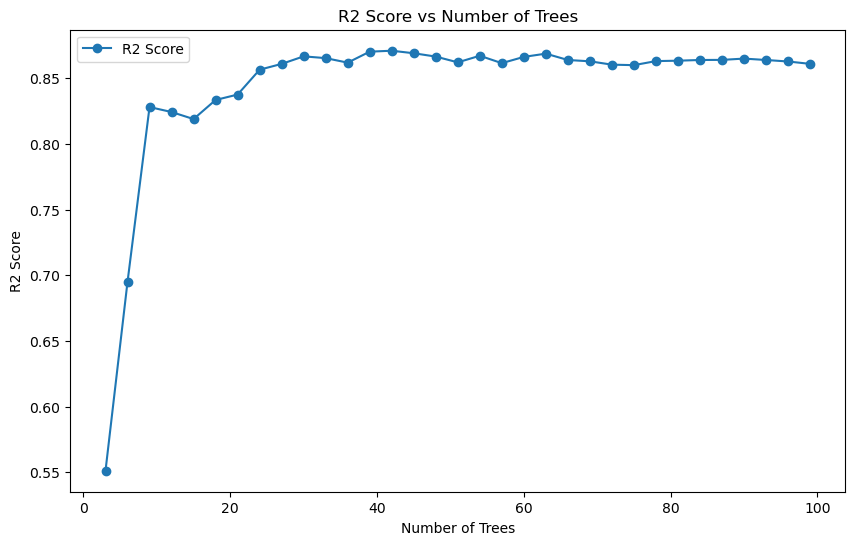

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Espacio de parámetros
params = {
    'sample_size_ratio': 2/3,  # Cantidad de datos de muestreo (1/3 del total)
    'validation_size_ratio': 0.2,  # Cantidad de datos de validación (20% del total de datos)
    'n_estimators': 100,  # Número de árboles en el random forest
    'tree_type': 'regressor',  # Tipo de árbol: 'regressor' o 'classifier'
    'random_state': 42,  # Semilla para la reproducibilidad
    'max_depth': None,  # Profundidad máxima de los árboles
    'min_samples_leaf': 1,  # Número mínimo de muestras por hoja
    'n_splits': 5  # Número de splits para bootstrapping
}

# Definir el dataframe
df = df_top_features

# Separar características y objetivo
X = df.drop(columns=['Nivel de Precios (P)'])
y = df['Nivel de Precios (P)']

# Dividir el conjunto de datos en entrenamiento y validación
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=params['validation_size_ratio'], random_state=params['random_state'])

# Función para calcular R2 ajustado
def calculate_adjusted_r2(n, r2, k):
    if n - k - 1 == 0:
        return np.nan  # Para evitar la división por cero
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2

# Función para realizar el muestreo con bootstrapping y entrenamiento del modelo
def train_random_forest(params, X_train_full, y_train_full, X_val, y_val):
    r2_scores = []
    adjusted_r2_scores = []
    total_indices = set(X_train_full.index)
    selected_indices = set()

    for i in range(params['n_splits']):
        # Muestreo aleatorio con bootstrapping
        sample_size = int(len(X_train_full) * params['sample_size_ratio'])
        X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=sample_size, random_state=params['random_state'] + i, shuffle=True)
        
        # Registrar los índices seleccionados
        selected_indices.update(X_train.index)
        
        # Seleccionar el tipo de modelo
        if params['tree_type'] == 'regressor':
            model = RandomForestRegressor(
                n_estimators=params['n_estimators'],
                random_state=params['random_state'],
                max_depth=params['max_depth'],
                min_samples_leaf=params['min_samples_leaf']
            )
        else:
            model = RandomForestClassifier(       #Lo agregue pensando en realizar pruebas futuras
                n_estimators=params['n_estimators'],
                random_state=params['random_state'],
                max_depth=params['max_depth'],
                min_samples_leaf=params['min_samples_leaf']
            )
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Predicción
        y_pred = model.predict(X_val)
        
        # Calcular R2 y almacenar
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)
        
        # Calcular R2 ajustado y almacenar
        n = len(y_val)
        k = X_train.shape[1]  # número de características
        adjusted_r2 = calculate_adjusted_r2(n, r2, k)
        adjusted_r2_scores.append(adjusted_r2)

    return r2_scores, adjusted_r2_scores, selected_indices

# Función para graficar error vs número de árboles
def plot_error_vs_trees(params, X_train_full, y_train_full, X_val, y_val):
    n_trees = list(range(3, params['n_estimators'] + 1, 3))
    r2_scores = []
    adjusted_r2_scores = []

    for n in n_trees:
        params['n_estimators'] = n
        r2, adjusted_r2, _ = train_random_forest(params, X_train_full, y_train_full, X_val, y_val)
        r2_scores.append(np.mean(r2))
        adjusted_r2_scores.append(np.mean(adjusted_r2))

    # Gráfico de R2 Score vs Número de Árboles
    plt.figure(figsize=(10, 6))
    plt.plot(n_trees, r2_scores, marker='o', label='R2 Score')
    plt.xlabel('Number of Trees')
    plt.ylabel('R2 Score')
    plt.title('R2 Score vs Number of Trees')
    plt.legend()
    plt.show()

    # Gráfico de R2 Ajustado vs Número de Árboles
    # plt.figure(figsize=(10, 6))
    # plt.plot(n_trees, adjusted_r2_scores, marker='x', label='Adjusted R2', color='red')
    # plt.xlabel('Number of Trees')
    # plt.ylabel('Adjusted R2')
    # plt.title('Adjusted R2 vs Number of Trees')
    # plt.legend()
    # plt.show()

# Ejecutar y visualizar los gráficos
plot_error_vs_trees(params, X_train_full, y_train_full, X_val, y_val)